<a href="https://colab.research.google.com/github/jcmachicao/uc_curso_modelamientopredictivo/blob/master/modpred__09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**9**
#### Cuaderno 09
# **Curso Modelamiento Predictivo**
---
### **Modelamiento Predictivo para Textos**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import nltk
nltk.download('punkt')
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [76]:
textos = [
          ['daños', 'Entraron a la tienda y se llevaron todo lo que pudieron.'],
          ['tecnología', 'Felizmente que estaban encendidas las cámaras y todo fue registrado, porque las habíamos instalado hace unos meses.'],
          ['daños', 'La pérdida fue de más de dos millones de soles, porque se llevaron todo.'],
          ['tecnología', 'Tenemos alarmas que están encendidas todo el día.'],
          ['tecnología', 'Pudimos rastrear a los delincuentes porque tenemos sensores de movimientos violentos en casi todos los establecimientos'],
          ['daños', 'Hubo al menos 300 víctimas, de las cuales lamentablemente fallecieron 4.'],
          ['tecnología', 'Los patrulleros están preparados para terrenos difíciles y muchos de ellos tienen acondicionados servidores de análisis rápido.'],
          ['riesgo', 'Las mafias están organizadas y comunicadas en varios departamentos, y se sabe que se brindan ayuda entre ellas.'],
          ['riesgo', 'Hay datos acerca de cómo ha crecido la posibilidad de delincuencia en Trujillo porque los reportes son cada vez más frecuentes.'],
          ['daños', 'El asalto de varias viviendas en el distrito ha dejado más de 20 familias prácticamente en la pobreza.'],
          ['riesgo', 'El patrullaje es necesario porque reduce la presencia de criminales que pueden articularse en varios distritos.'],
          ['riesgo', 'Si no se implementa un sistema de monitoreo no lograremos contrarrestar a las mafias organizadas que se incrementan.'],
          ['tecnología', 'El sistema de monitoreo es imprescindible porque permite una cobertura amplia cuando se instala en todos los distritos.'],
          ['riesgo', 'Aquí en Puno ha crecido la delincuencia porque los reportes son cada vez más frecuentes con mayor probabilidad.'],
          ['daños', 'Las víctimas de agresiones en estos últimos años han tenido daños más remanentes.'],
          ['tecnología', 'Los patrulleros están preparados para instalarse en el primer trimestre, para que estén operativos inmediatamente después.'],
          ]
tex_df = pd.DataFrame(textos)
tex_df.columns = ['tipo', 'textos']

In [ ]:
tex_df.head()

In [77]:
common_texts = tex_df.textos
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=2, window=3, min_count=1, workers=4)
model.train(documents, total_examples=model.corpus_count, epochs=100)
vecs = []
for j in range(len(documents)):
  vecs.append(model.docvecs[j])
vecs_arr = np.array(vecs)
print(vecs_arr.shape)
tex_df['v1'] = vecs_arr[:,0]
tex_df['v2'] = vecs_arr[:,1]

(16, 2)


[]

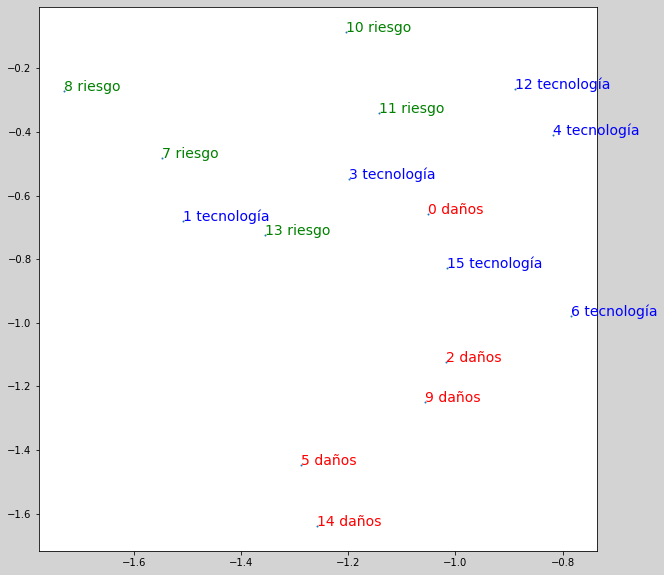

In [78]:
colores = {'tecnología': 'blue', 'daños': 'red', 'riesgo': 'green'}
plt.figure(figsize=(10,10), facecolor='lightgray')
plt.scatter(tex_df.v1, tex_df.v2, s=1)

for k in range(len(tex_df)):
  plt.text(tex_df.v1[k], tex_df.v2[k], 
           str(k) + ' ' + tex_df.tipo[k], 
           c=tex_df['tipo'].map(colores)[k],
           fontsize=14
           )
plt.plot()